# Data Understanding and Data Preparation

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('customer_supermarket.csv', sep='\t', index_col=0)
df.drop_duplicates(inplace=True)
print(df.head())

  BasketID      BasketDate  Sale  CustomerID CustomerCountry  ProdID  \
0   536365  01/12/10 08:26  2,55     17850.0  United Kingdom  85123A   
1   536365  01/12/10 08:26  3,39     17850.0  United Kingdom   71053   
2   536365  01/12/10 08:26  2,75     17850.0  United Kingdom  84406B   
3   536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029G   
4   536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029E   

                             ProdDescr  Qta  
0   WHITE HANGING HEART T-LIGHT HOLDER    6  
1                  WHITE METAL LANTERN    6  
2       CREAM CUPID HEARTS COAT HANGER    8  
3  KNITTED UNION FLAG HOT WATER BOTTLE    6  
4       RED WOOLLY HOTTIE WHITE HEART.    6  


In [3]:
### Types checking and basic statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466678 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         466678 non-null  object 
 1   BasketDate       466678 non-null  object 
 2   Sale             466678 non-null  object 
 3   CustomerID       401605 non-null  float64
 4   CustomerCountry  466678 non-null  object 
 5   ProdID           466678 non-null  object 
 6   ProdDescr        465925 non-null  object 
 7   Qta              466678 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 32.0+ MB


In [5]:
df.isnull().any()

BasketID           False
BasketDate         False
Sale               False
CustomerID          True
CustomerCountry    False
ProdID             False
ProdDescr           True
Qta                False
dtype: bool

In [6]:
df.describe()

,CustomerID,Qta
count,401605.000000,466678.000000
mean,15281.154341,10.806528
std,1714.008869,232.627771
min,12346.000000,-80995.000000
25%,13939.000000,2.000000
50%,15145.000000,4.000000
75%,16784.000000,12.000000
max,18287.000000,80995.000000


### Fixing _Sale_:
* Check if any element of _Sale_ contains letters / drop rows containing letters in _Sale_
* Replace commas with dots
* Cast the field into float

In [7]:
# OPTION 1: Check if 'Sale' contains any letter
import re
for elem in df['Sale']:
    if re.match(elem, r'[a-zA-Z]*'):
        print(elem)

In [8]:
# OPTION 2: directly drop rows containing letters in the 'Sale' filed
df.drop(df[ df['Sale'].str.contains(r'[a-zA-Z]') ].index)

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
541905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
541906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
541908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


The attribute _Sale_ does not contain any null value or letters, only numbers.<br>
We need now to substitute commas with dots and cast the field into float

In [9]:
# Replace commas with dots and make 'Sale' a float
df['Sale'].replace(to_replace=r'(\d+),(\d*)', value=r'\1.\2', regex=True, inplace=True)
df['Sale'] = df['Sale'].astype(float)
print('Changed commas into dots')
print('Changed type from str to float64\n')
# drop all rows where sale is zero (free stuf not allowed)
df.drop(df[df['Sale'] < 0.01].index, inplace=True)
df.info()

Changed commas into dots
Changed type from str to float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465394 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         465394 non-null  object 
 1   BasketDate       465394 non-null  object 
 2   Sale             465394 non-null  float64
 3   CustomerID       401561 non-null  float64
 4   CustomerCountry  465394 non-null  object 
 5   ProdID           465394 non-null  object 
 6   ProdDescr        465394 non-null  object 
 7   Qta              465394 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 32.0+ MB


# Trying new stuff

{'whiskers': [<matplotlib.lines.Line2D at 0x26aaa119100>,
 'caps': [<matplotlib.lines.Line2D at 0x26aaa119fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26aa83d75e0>],
 'medians': [<matplotlib.lines.Line2D at 0x26ab80160d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26aaaa8c190>],
 'means': []}

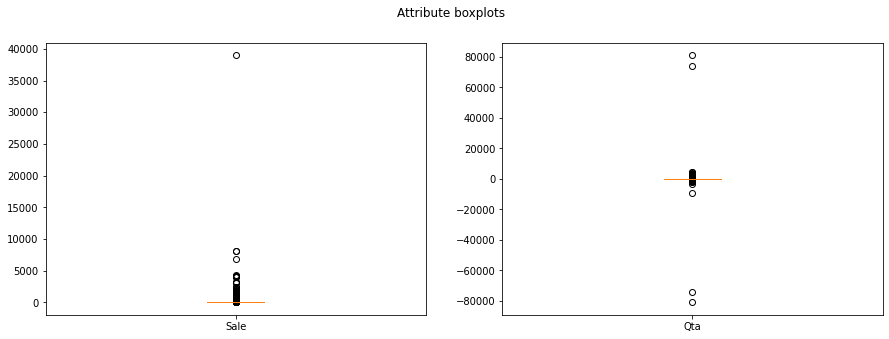

In [33]:
f, ax = plt.subplots(1,2,figsize=(15, 5))
f.suptitle('Attribute boxplots')

ax[0].boxplot(df[df.columns[2]], labels = [df.columns[2]])
ax[1].boxplot(df[df.columns[7]], labels = [df.columns[7]])
    

In [31]:
df[df['Sale'] > 10000]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
222681,C556445,10/06/11 15:31,38970.0,15098,United Kingdom,M,Manual,-1


In [22]:
df[abs(df['Qta']) > 5000]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
4268,C536757,02/12/10 14:23,0.03,15838.0,United Kingdom,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360
61619,541431,18/01/11 10:01,1.04,12346.0,United Kingdom,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215
61624,C541433,18/01/11 10:17,1.04,12346.0,United Kingdom,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215
540421,581483,09/12/11 09:15,2.08,16446.0,United Kingdom,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
540422,C581484,09/12/11 09:27,2.08,16446.0,United Kingdom,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995


In [23]:
df[abs(df['CustomerID']) == 15838.0]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
4268,C536757,02/12/10 14:23,0.03,15838.0,United Kingdom,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360
14269,537476,07/12/10 11:26,1.85,15838.0,United Kingdom,22379,RECYCLING BAG RETROSPOT,150
14270,537476,07/12/10 11:26,1.85,15838.0,United Kingdom,22381,TOY TIDY PINK POLKADOT,100
14271,537476,07/12/10 11:26,1.65,15838.0,United Kingdom,85099B,JUMBO BAG RED RETROSPOT,300
79207,542921,02/02/11 07:58,1.85,15838.0,United Kingdom,22379,RECYCLING BAG RETROSPOT,100
...,...,...,...,...,...,...,...,...
506975,579163,28/11/11 13:59,1.79,15838.0,United Kingdom,22865,HAND WARMER OWL DESIGN,96
506976,579163,28/11/11 13:59,1.79,15838.0,United Kingdom,22633,HAND WARMER UNION JACK,96
506977,579163,28/11/11 13:59,1.45,15838.0,United Kingdom,22759,SET OF 3 NOTEBOOKS IN PARCEL,144
506978,579164,28/11/11 14:00,1.85,15838.0,United Kingdom,22866,HAND WARMER SCOTTY DOG DESIGN,96


There are some clear outliers, let's see if we can improve the situation by cleaning other attributes first...

### Analyzing _Qta_:
* Check rows with **negative** quantity:

In [24]:
# Check rows with negative quantity
bid_normal = 0  # counter of rows with normal BasketID (but negative Qta)
proddescr_null = 0  # counter of rows with a empty or null or '?' ProdDescr
cid_null = 0    # counter of rows with a null/nan/empty CustomerID
neg_df = df[df['Qta'] < 0]

for index, row in tqdm(neg_df.iterrows(), total=len(neg_df), desc="Iterating over negative Qta rows"):
    bid_normal += 1 if (not 'C' in row['BasketID'] and not 'A' in row['BasketID']) else 0
    proddescr_null += 1 if row['ProdDescr'] in ('','?') else 0
    cid_null += 1 if pd.isna(row['CustomerID']) else 0

print("Number of rows with negative Qta: ", len(df[df['Qta'] < 0]))
print("Number of rows with negative Qta and a normal BaskedID: ", bid_normal)
print("Number of rows with negative Qta and an empty/null/'?' ProdDescr: ", proddescr_null)
print("Number of rows with negative Qta and a null/nan/empty CustomerID: ", cid_null)


Number of rows with negative Qta:  9051
Number of rows with negative Qta and a normal BaskedID:  0
Number of rows with negative Qta and an empty/null/'?' ProdDescr:  0
Number of rows with negative Qta and a null/nan/empty CustomerID:  179


### Analyzing _CustomerID_:
* Check for how many orders it's not possible to find a _CustomerID_
* Remove entries with no retrievable _CustomerID_
* Make _CustomerID_ of type **int**

In [25]:
"""
Check for which BaskedIDs it's not possible to find a CustomerID:
    - if a CustomerID is NaN, but there exist a row with the same BaskedID and CustomerID != Nan, then we have a customer for that order.

We produce a dictionary with BaskedIDs as keys and boolean values:
    - if there's a customer for that BaskedID, it's True, otherwise it's False
"""

#print("Checking rows with no CustomerID...")
orders_have_customer = dict(zip(
    df['BasketID'].unique(),    # keys
    [False] * len(df['BasketID'].unique()))  # values (initially False for every key)
)

for index, row in tqdm(df.iterrows(), total=len(df), desc="Checking rows with no CustomerID"):
    if not pd.isna(row['CustomerID']):
        orders_have_customer[row['BasketID']] = True

orders_wo_cust = [] # list of orders without CustomerID
for k, v in orders_have_customer.items():
    if not v:
        orders_wo_cust.append(k)

del orders_have_customer
print("Number of distinct orders: ", len(df['BasketID'].unique()))
print("Number of orders without CustomerID: ", len(orders_wo_cust))


Number of distinct orders:  23562
Number of orders without CustomerID:  1376


In [26]:
# Delete from dataframe records belonging to orders without customer
df = df[~df['BasketID'].isin(orders_wo_cust)]
del orders_wo_cust
print(f"The dataframe contains now {len(df)} rows")
print(f"Remaining entries with a NaN CustomerID: {len(df[pd.isna(df['CustomerID'])])}")

The dataframe contains now 401561 rows
Remaining entries with a NaN CustomerID: 0


In [27]:
# Check if the decimal part is always 0
count_decpart_nonzero = 0
for elem in df['CustomerID']:
    if elem % 1.0 != 0.0 and not pd.isnull(elem):
        count_decpart_nonzero += 1
print('Number of CustomerIDs with decimal part != 0: ', count_decpart_nonzero)

Number of CustomerIDs with decimal part != 0:  0


In [28]:
# Make 'CustomerID' of type int
if count_decpart_nonzero == 0:
    df = df.astype({'CustomerID': int})

df.dtypes

BasketID            object
BasketDate          object
Sale               float64
CustomerID           int32
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object

Let's perform again the analysis on Qta we did before analysing CustomerID:

In [29]:
# Check rows with negative quantity
bid_normal = 0  # counter of rows with normal BasketID (but negative Qta)
proddescr_null = 0  # counter of rows with a empty or null or '?' ProdDescr
cid_null = 0    # counter of rows with a null/nan/empty CustomerID
neg_df = df[df['Qta'] < 0]

for index, row in tqdm(neg_df.iterrows(), total=len(neg_df), desc="Iterating over negative Qta rows"):
    bid_normal += 1 if (not 'C' in row['BasketID'] and not 'A' in row['BasketID']) else 0
    proddescr_null += 1 if row['ProdDescr'] in ('','?') else 0
    cid_null += 1 if pd.isna(row['CustomerID']) else 0

print("Number of rows with negative Qta: ", len(df[df['Qta'] < 0]))
print("Number of rows with negative Qta and a normal BaskedID: ", bid_normal)
print("Number of rows with negative Qta and an empty/null/'?' ProdDescr: ", proddescr_null)
print("Number of rows with negative Qta and a null/nan/empty CustomerID: ", cid_null)


Number of rows with negative Qta:  8872
Number of rows with negative Qta and a normal BaskedID:  0
Number of rows with negative Qta and an empty/null/'?' ProdDescr:  0
Number of rows with negative Qta and a null/nan/empty CustomerID:  0


This shows that every row of the orders with a NaN _CustomerID_ had also
anomalous values of _BasketID_ and _ProdDescr_

In [32]:
all_paired = True
count_pairs = count_legal_pairs = count_not_paired = 0
for index, row in tqdm(df[df['Qta'] < 0].iterrows(), total=len(df[df['Qta'] < 0]), desc='Iterating over negative Qta rows'):
    found = False
    df_aux = df[df['CustomerID'] == row['CustomerID']]
    df_aux = df_aux[df_aux['ProdID'] == row['ProdID']]
    df_aux = df_aux[df_aux['Qta'] > 0]
    if len(df_aux) > 0:
        found = True
        count_pairs += 1
        for i, r in df_aux.iterrows():
            if r['Qta'] >= abs(row['Qta']):
                count_legal_pairs += 1
                break

    if not found:
        all_paired = False
        count_not_paired += 1

del df_aux

print("All negative entries have a corresponding positive one: ", all_paired)
print("The negative entries which are not matched are: ", count_not_paired)
print("The negative entries which are matched are: ", count_pairs)
assert(len(df[df['Qta'] < 0]) == count_not_paired + count_pairs)
print("The legal negative entries are: ", count_legal_pairs)


All negative entries have a corresponding positive one:  False
The negative entries which are not matched are:  947
The negative entries which are matched are:  7925
The legal negative entries are:  7831


#### Further checks on entries with a negative quantity:<br>
* We assume them to be returned products, but we need to check that every "negative" product
has a corresponding "positive" one. Moreover it's necessary to be sure that the |(quantity * price)| of a
returned product is <= of (quantity * price) of a corresponding bought one.

* We noticed some of these entries have 'Discount' as product description (ProdID = 'D'), <br>
we want to keep these since we assume they represent relevant information about discounts which customers got duringtheir shopping.

In [ ]:
# Initialize variables to analyze correctness of negative Qta rows
# Dictionaries indexed by tuple (CustomerID, ProdID, Sale), value is Qta (or (Qta, list(indexes)) )
pos_quant_tot = {}
neg_quant_tot = {}

for index, row in tqdm(df.iterrows(), total=len(df), desc="Iterating over dataset"):
    if row['Qta'] > 0:
        if (row['CustomerID'], row['ProdID'], row['Sale']) not in pos_quant_tot.keys():
            pos_quant_tot[(row['CustomerID'], row['ProdID'], row['Sale'])] = row['Qta']
        else:
            pos_quant_tot[(row['CustomerID'], row['ProdID'], row['Sale'])] += row['Qta']

    elif row['ProdID'] != 'D':  # exclude 'Discount' rows from those dictionaries --> they won't be dropped from df
        if (row['CustomerID'], row['ProdID'], row['Sale']) not in neg_quant_tot.keys():
            l = [index]
            neg_quant_tot[(row['CustomerID'], row['ProdID'], row['Sale'])] = (-1*row['Qta'], l)
        else:
            prev = neg_quant_tot[(row['CustomerID'], row['ProdID'], row['Sale'])]
            prev[1].append(index)
            neg_quant_tot[(row['CustomerID'], row['ProdID'], row['Sale'])] = (prev[0]-row['Qta'], prev[1])

positive_elements = set(pos_quant_tot.keys())
negative_elements = set(neg_quant_tot.keys())

In [ ]:
# drop negative Qta rows that are not matched with positive ones
not_valid = negative_elements - (positive_elements & negative_elements)
indexes_todelete = []
for key in not_valid:
    for x in neg_quant_tot[key][1]:
        indexes_todelete.append(x)
df.drop(indexes_todelete, inplace=True)

In [ ]:
# drop negative Qta rows that are invalid neg_qta > pos_qta
indexes_todelete = []
for key in positive_elements & negative_elements:
    if pos_quant_tot[key] < neg_quant_tot[key][0]:
            for x in neg_quant_tot[key][1]:
                indexes_todelete.append(x)
df.drop(indexes_todelete, inplace=True)

In [ ]:
df.info()

## Outliers analysis

### _Sale_'s values range:

In [ ]:
df.boxplot(column=['Sale'])

In [ ]:
print(f"Total number of rows: {len(df['Sale'])}")
print(f"Number of rows with a value of 'Sale' > 3000: {len(df[df['Sale'] > 3000])}")
print(f"Number of rows with a value of 'Sale' > 4000: {len(df[df['Sale'] > 4000])}")
print(f"Number of rows with a value of 'Sale' > 8000: {len(df[df['Sale'] > 8000])}")

In [ ]:
# Only 9 entries over 400K --> we drop this rows and replot the boxplot
df.drop(df[df['Sale'] > 3000].index, inplace=True)
df.boxplot(column=['Sale'])

### _Qta_'s values ranges:

In [ ]:
df.boxplot(column=['Qta'])
limit = 10000
print(f"Number of rows with a value of 'Qta' > 10000: {len(df[df['Qta'] > limit])}")
print(f"Number of rows with a value of 'Qta' < -10000: {len(df[df['Qta'] < -limit])}")

In [ ]:
# print anomalous rows
print('Rows with a quantity value grater than 60000 or less than -60000:\n')
for index, row in df[(df['Qta'] > limit) | (df['Qta'] < -limit)].iterrows():
    print(row, '\n')

For each of the 2 rows with a _Qta_ grater than 60000 there's a row with exactly
the opposite value of _Qta_ and the same _CustomerID_, _ProdID_ and _ProdDescr_.<br>
Even though they "eliminate each other", we drop them because we consider them outliers

In [ ]:
df.drop(df[(df['Qta'] < -limit) | (df['Qta'] > limit)].index, inplace=True)
df.boxplot(column=['Qta'])

# Suspect product IDs analysis

### Analyzing Sale we can still see a well defined outlier-like region where Sale > 1000

In [ ]:
df.boxplot(column=['Sale'])

print(f"Total number of rows: {len(df['Sale'])}")
print(f"Number of rows with a value of 'Sale' > 1000: {len(df[df['Sale'] > 1000])}")
print(f"Number of rows with a value of 'Sale' > 2000: {len(df[df['Sale'] > 2000])}")


In [ ]:
df[df['Sale'] > 1000]

### We notice this outliers-like values have some particular values in ProdID: M and DOT
#### And we become curious about the presence of these particular ProdIDs..

In [ ]:
print("NON numerical ProdIDs:", df[df['ProdID'].str.contains(r'^\D*$', regex=True)]['ProdID'].unique())

## ProdID = BANK CHARGES

In [ ]:
print("Number of rows with 'ProdID' = 'BANK CHARGES':", len(df[df['ProdID'] == 'BANK CHARGES']))
df[df['ProdID'] == 'BANK CHARGES'].boxplot(column = ['Sale','Qta'])

We assume these entries represent some kind of bank payment that may not be strictly correlated to our customer sale analysis.<br>
Therefore we decide to DROP these entries.

In [ ]:
df.drop(df[df['ProdID'] == 'BANK CHARGES'].index, inplace=True)

## ProdID = DISCOUNT

We already noticed and discussed about these entries before, we assume the obvious interpretation:<br>
These entries regard discounts on some shopping-related sale about a certain customer. This means it is a relevant set of entries.<br>
Therefore we decide to KEEP these entries.

## ProdID = DOT

In [ ]:
print("Number of rows with 'ProdID' = 'DOT':", len(df[df['ProdID'] == 'DOT']))
print("Product description of these entries:", df[df['ProdID'] == 'DOT']['ProdDescr'].unique())
df[df['ProdID'] == 'DOT'].boxplot(column = ['Sale','Qta'])

In [ ]:
df[df['ProdID'] == 'DOT'].describe()

We assume these entries have something to do with postage payments (because of their ProdDescr) and so they are not relevant for our customer sale analysis.<br>
Furthermore, by taking a look at the statistics, we can see how these entries have an outlier-like behaviour.
Therefore we decide to DROP these entries.

In [ ]:
df.drop(df[df['ProdID'] == 'DOT'].index, inplace=True)

## ProdID = POST

In [ ]:
print("Number of rows with 'ProdID' = 'POST':", len(df[df['ProdID'] == 'POST']))
print("Product description of these entries:", df[df['ProdID'] == 'POST']['ProdDescr'].unique())
df[df['ProdID'] == 'POST'].boxplot(column = ['Sale','Qta'])

In [ ]:
df[df['ProdID'] == 'POST'].describe()

Even though these entries have a more "normal" behaviour with respect to the entries having ProdID = 'DOT',<br>
we assume these entries ALSO have something to do with postage payments (again because of their ProdDescr) and so they are not relevant for our customer sale analysis.<br>
Therefore we decide to DROP these entries too.

In [ ]:
df.drop(df[df['ProdID'] == 'POST'].index, inplace=True)

# ProdID = M



In [ ]:
print("Number of rows with 'ProdID' = 'M':", len(df[df['ProdID'] == 'M']))
print("Product description of these entries:", df[df['ProdID'] == 'M']['ProdDescr'].unique())
df[df['ProdID'] == 'M'].boxplot(column = ['Sale','Qta'])

In [ ]:
df[df['ProdID'] == 'M'].describe()

Since these entries have all ProdDescr = 'Manual' we assume these entries are describing payments due/received about manual works.<br>
Unfortunately we do not have any more information which can further caracterize these entries, they could be referring to a huge plethora of manual topics which may regard (or not) our customer sale analysis.<br>
Therefore we decide to DROP these entries.

In [ ]:
df.drop(df[df['ProdID'] == 'M'].index, inplace=True)

### After analyzing all suspect ProdIDs we take a look at Sale again

In [ ]:
df.boxplot(column=['Sale'])
df[df['Sale'] > 1000]

We now have a much cleaner result, only value being 'abnormal' is a Discount value, which we already decided to maintain.<br>
Finally we proceed to:

**Save cleaned dataframe in a csv**

In [ ]:
path = 'cleaned_dataframe.csv'
df.to_csv(path, sep='\t')
print(f"Cleaned dataframe saved to '{path}'")